# 03-Titanic
- 타이타닉 탑승객의 생존률 예측

### 패키지 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

np.random.seed(777)

## 데이터 가져오기 및 데이터 정보 확인
- 절대경로, 상대경로, URL
- 기본적으로 엑셀 파일의 첫 번째 sheet를 로드한다. 만약 다른 sheet를 가져오고자 할 경우 'sheet_name = "???"' 파라미터를 추가한다.

#### 데이터 컬럼 설명

- pclass: 객실 등급
- survived: 생존 유무
- sex: 성별
- age: 나이
- sibsp: 형제 혹은 부부의 수
- parch: 부모, 혹은 자녀의 수
- fare: 지불한 운임
- boat: 탈출한 보트가 있다면 boat 번호

In [3]:
raw_data = pd.read_excel("http://itpaper.co.kr/demo/tensorflow/titanic.xlsx")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
raw_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 데이터 요약정보 확인
- 평균 생존률은 38.2%

In [4]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### 생존률 시각화

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


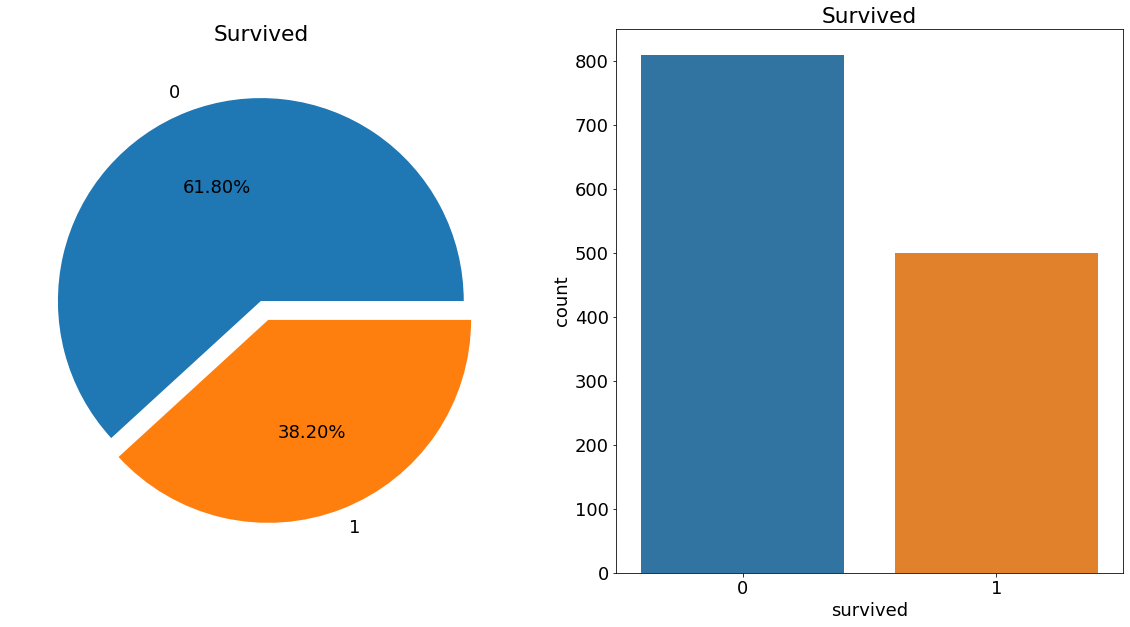

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (20, 10)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

raw_data['survived'].value_counts().plot.pie(explode = [0, 0.1],
                                                       autopct = '%1.2f%%',    # .2f : 소수점 둘째자리까지
                                                       ax = ax1)
ax1.set_title('Survived')
ax1.set_ylabel('')       # 라벨이 필요 없는 경우 이렇게 명시해줘야 그래프에 나타나지 않는다.

sns.countplot('survived', data = raw_data, ax = ax2)
ax2.set_title('Survived')
plt.show()

### 탑승자 연령 분포
> 10대 후반 - 30대 초반이 많이 탑승하고 있으며 노인층보다는 갓난 아기들이 많이 탑승했다.

<AxesSubplot:>

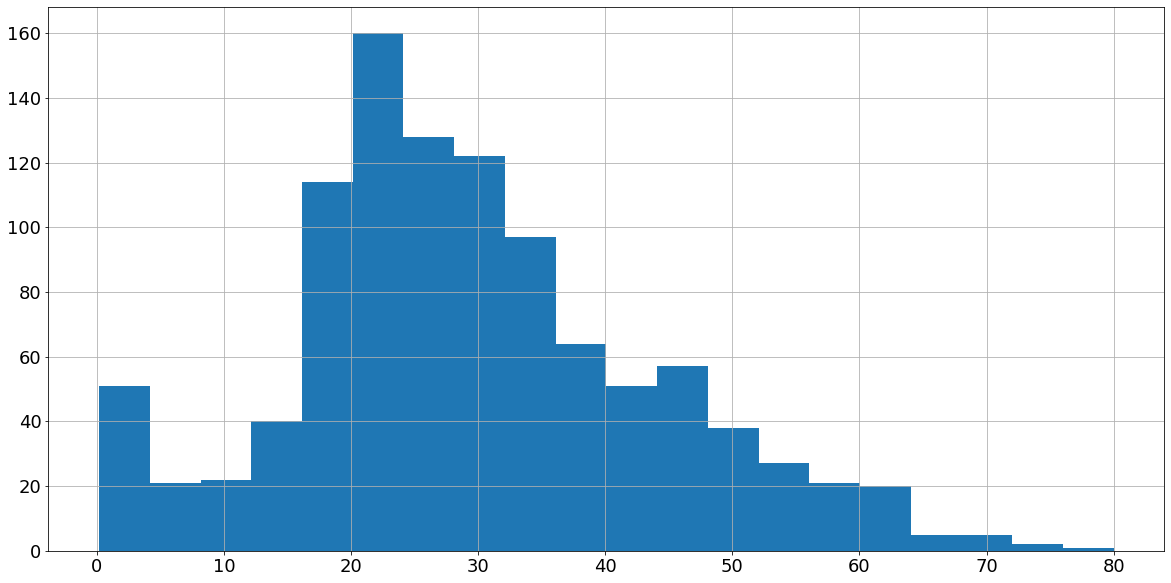

In [8]:
raw_data['age'].hist(bins = 20)

### 선실의 등급별 상황
> 1등실의 생존률이 높다. 3등실의 나이 평균이 낮은 것으로 보아 갓난 아이들이 많이 탑승한 것으로 추측할 수 있다.

In [12]:
pclass_df = raw_data.filter(['pclass','survived']).groupby('pclass').mean()
pclass_df

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


### 선실의 등급별 생존 여부 시각화

<Figure size 1440x720 with 0 Axes>

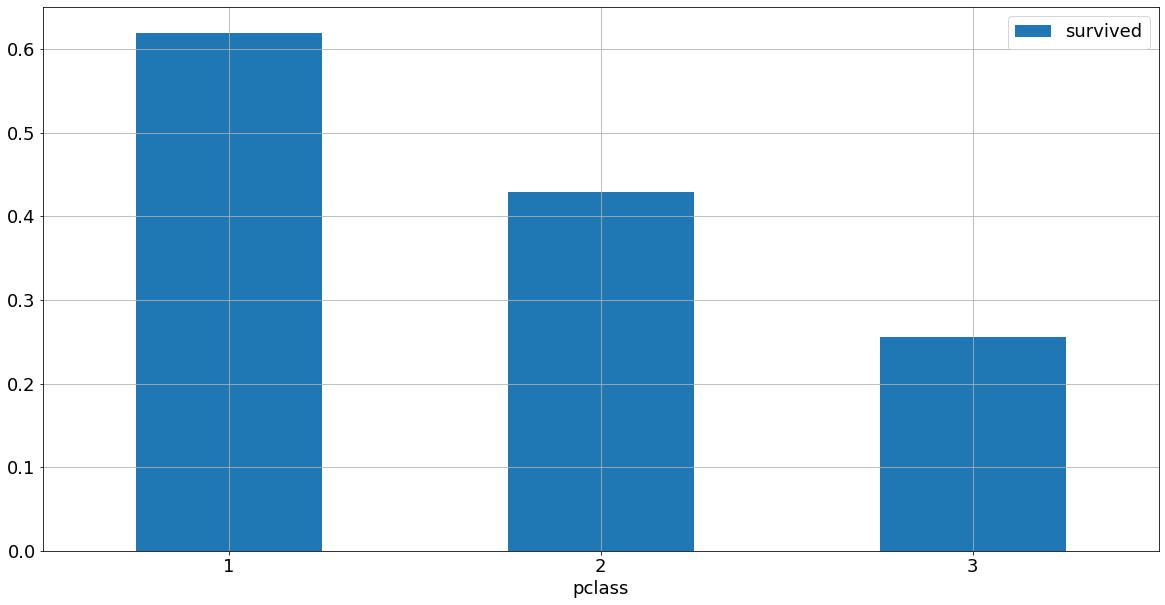

In [18]:
plt.figure()
pclass_df.plot.bar(rot = 0)
plt.grid()
plt.show()

### 서로 연광성 있는 데이터를 찾기 위한 상관계수 확인
> survived는 pclass, fare와 관계가 있다.

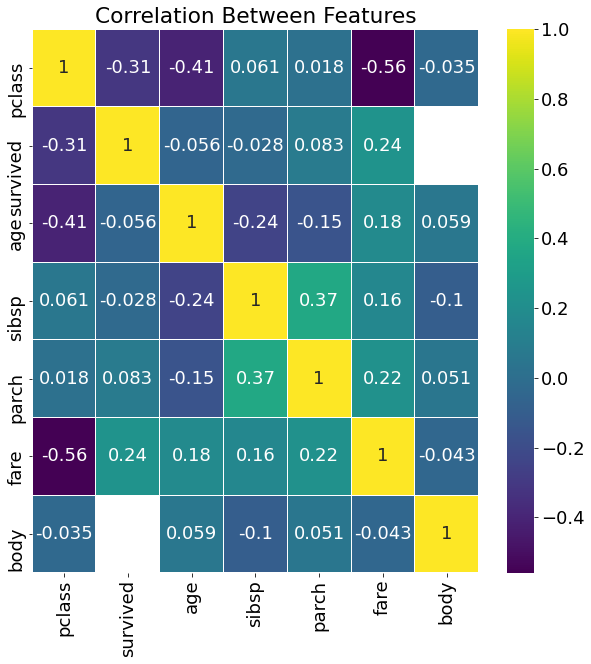

In [20]:
plt.figure(figsize = (10, 10))
sns.heatmap(raw_data.corr(), linewidths = 0.01, square = False,
           annot = True, cmap = plt.cm.viridis, linecolor = 'white')   # annot = 수치값을 적을 지
plt.title('Correlation Between Features')
plt.show()

### 연령층 나누기

In [21]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins = [0, 10, 20, 50, 100],
                            include_lowest = True, labels = ['baby', 'teenager', 'adult', 'old'])
raw_data['age_cat']

0          adult
1           baby
2           baby
3          adult
4          adult
          ...   
1304    teenager
1305         NaN
1306       adult
1307       adult
1308       adult
Name: age_cat, Length: 1309, dtype: category
Categories (4, object): ['baby' < 'teenager' < 'adult' < 'old']

### 객실, 연령층, 성별에 따른 생존률 분석
- 1등급 객실이 생존률이 높다.
- baby 등급의 연령대 생존률이 다른 연령대보다 높다.
- 여성의 생존률이 높다.

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

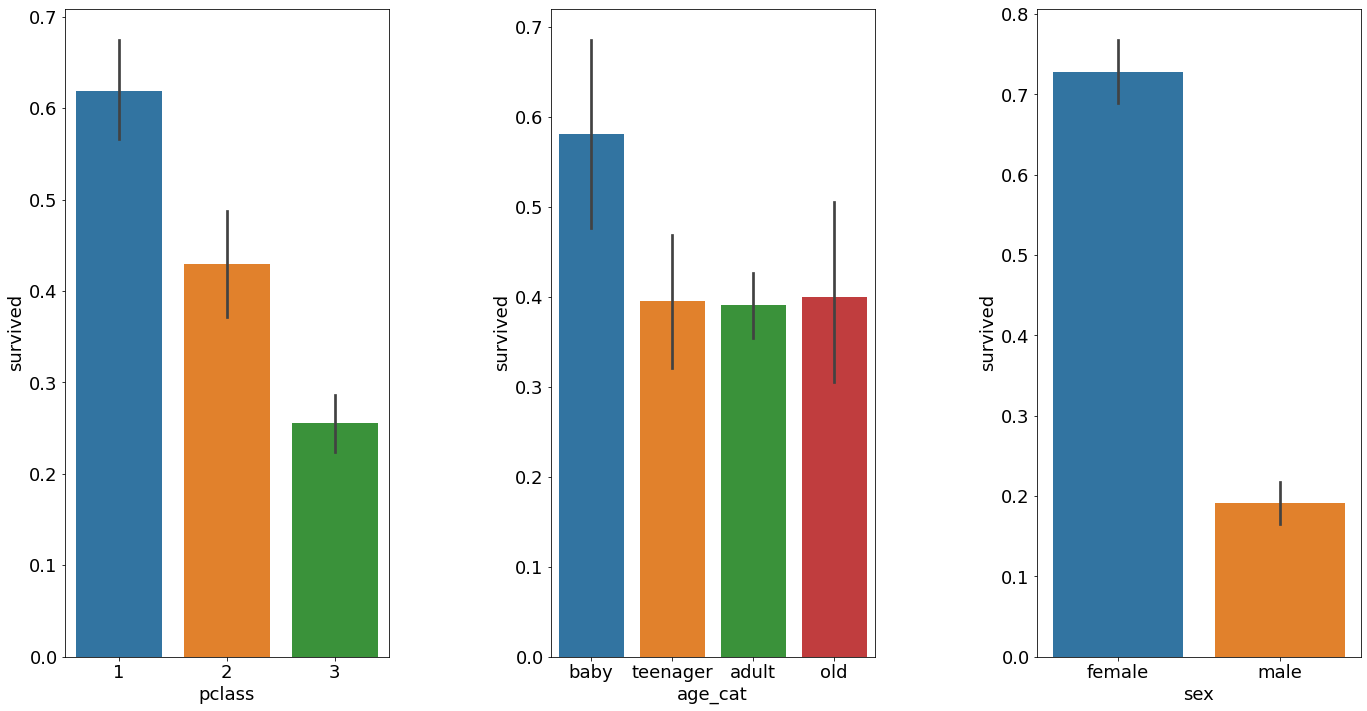

In [22]:
plt.figure()

# 1행 3열의 첫 번째 칸과 그 위치에 그려질 시각화 그래프
plt.subplot(131)
sns.barplot('pclass', 'survived', data = raw_data)

# 1행 3열의 두 번째 칸과 그래프
plt.subplot(132)
sns.barplot('age_cat', 'survived', data = raw_data)

# 1행 3열의 세 번째 칸과 그래프
plt.subplot(133)
sns.barplot('sex', 'survived', data = raw_data)

plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.10, right = 1, hspace = 0.5, wspace = 0.5)

plt.show()

### 연령대 분포 곡선

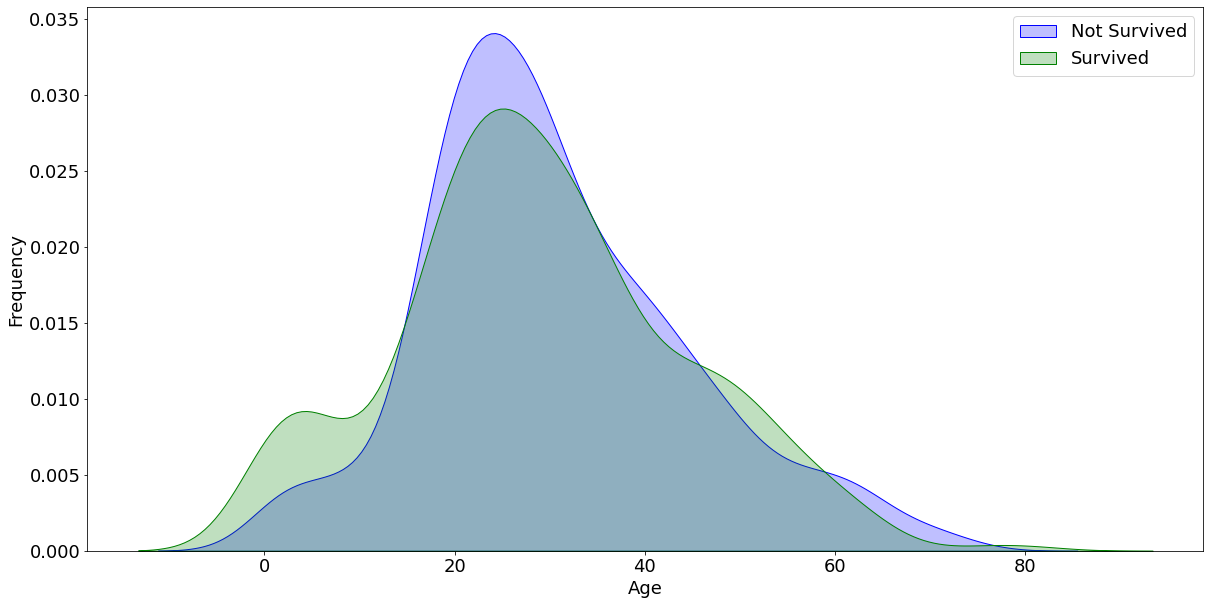

In [23]:
f, ax = plt.subplots()

# 첫 번째 그래프 g를 생성
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 0) & (raw_data['age'].notnull())],
               ax = ax, color = 'Blue', shade = True)

# 첫 번째 그래프 g에 새로운 그래프를 덧그림
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 1) & (raw_data['age'].notnull())],
               ax = g, color = 'Green', shade = True)

g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

plt.show()

### 성별 생존률 비율
> 남성의 승객 수가 두 배쯤 더 많음에도 불구하고 구조된 여성의 수가 두 배쯤 더 많다는 사실이 확실히 나타난다.

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


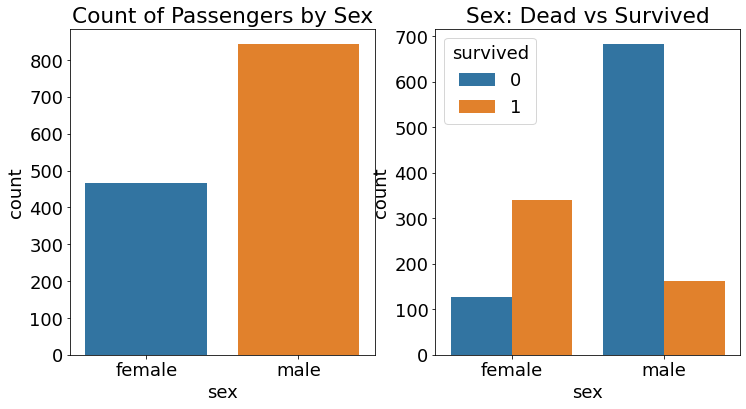

In [26]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot('sex', data = raw_data, ax = ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue = 'survived', data = raw_data, ax = ax[1])
ax[1].set_title('Sex: Dead vs Survived')
plt.show()

### 구조보트에 탑승한 사람들에 대한 생존률 확인

- 구조보트 탑승자 중 결측치를 제외하고 데이터 추출

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


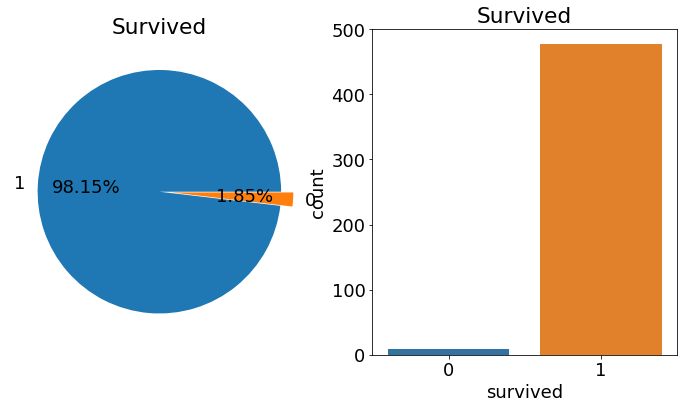

In [27]:
boat_survivors = raw_data[raw_data['boat'].notnull()]

f, ax = plt.subplots(1, 2, figsize = (12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data = boat_survivors, ax = ax[1])
ax[1].set_title('Survived')

plt.show()

### 딥러닝을 위한 데이터 전처리
> 데이터에서 여성을 1로 남성을 0으로 두고, 몇몇 데이터를 float형으로 선언한 뒤 nan이 있는 데이터는 제거

In [28]:
# 성별
raw_data['sex'] = np.where(raw_data['sex'] == 'female', 1, np.where(raw_data['sex'] == 'male', 0, np.nan))

# 생존 유무
raw_data['survived'] = raw_data['survived'].astype(np.float32)
# 객실 등급
raw_data['pclass'] = raw_data['pclass'].astype(np.float32)
# 성별
raw_data['sex'] = raw_data['sex'].astype(np.float32)
# 형제 혹은 부부의 수
raw_data['sibsp'] = raw_data['sibsp'].astype(np.float32)
# 부모 혹은 자녀의 수
raw_data['parch'] = raw_data['parch'].astype(np.float32)
# 지불한 운임
raw_data['fare'] = raw_data['fare'].astype(np.float32)

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float32 
 1   survived   1045 non-null   float32 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float32 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float32 
 6   parch      1045 non-null   float32 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float32 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float32(6), float64(2), object(6)
memory usage: 99.2+ KB


### 훈련 데이터와 테스트 데이터로 나누기

In [46]:
x_data = raw_data.values[:, [0, 3, 4, 5, 6, 8]]
y_data = raw_data.values[:, [1]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 777)

#### 임의로 훈련 데이터 출력해보기
- 데이터 타입이 float이 아닌 객체 형으로 나타난다.
- 외부에서 로드한 데이터들은 숫자가 아닌 경우가 많기 때문에 꼭 확인해야 한다. (dtype=object)

In [47]:
x_train

array([[2.0, 1.0, 23.0, 0.0, 0.0, 13.79170036315918],
       [1.0, 0.0, 54.0, 0.0, 0.0, 51.86249923706055],
       [2.0, 0.0, 16.0, 0.0, 0.0, 26.0],
       ...,
       [3.0, 1.0, 18.0, 0.0, 0.0, 7.775000095367432],
       [3.0, 0.0, 22.0, 0.0, 0.0, 7.5208001136779785],
       [1.0, 0.0, 64.0, 1.0, 4.0, 263.0]], dtype=object)

### 각 데이터를 float 타입으로 형변환
- dtype=float32

In [48]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

x_train

array([[  2.    ,   1.    ,  23.    ,   0.    ,   0.    ,  13.7917],
       [  1.    ,   0.    ,  54.    ,   0.    ,   0.    ,  51.8625],
       [  2.    ,   0.    ,  16.    ,   0.    ,   0.    ,  26.    ],
       ...,
       [  3.    ,   1.    ,  18.    ,   0.    ,   0.    ,   7.775 ],
       [  3.    ,   0.    ,  22.    ,   0.    ,   0.    ,   7.5208],
       [  1.    ,   0.    ,  64.    ,   1.    ,   4.    , 263.    ]],
      dtype=float32)

In [49]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(731, 6)
(731, 1)
(314, 6)
(314, 1)


### 모델 구성하기

In [50]:
model = Sequential()
model.add(Dense(255, input_shape = (6,), activation = 'relu'))
# sigmoid --> 출력 결과가 0-1 사이의 값을 갖는다. = 백분율
model.add(Dense((1), activation = 'sigmoid'))

### 학습 과정 설정
- 생존 => 1, 사망 => 0
- 과거의 어떤 데이터를 토대로 미래의 상황을 예측 => 회귀
- 회귀 분석의 결과가 0-1 사이의 결과를 갖는 형태의 로지스틱 회귀
- 회귀 분석의 손실 함수로 평균제곱오차(mse)를 사용함

In [51]:
model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


### 학습하기

In [52]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500)

Epoch 1/500
23/23 [==============================] - 0s 16ms/step - loss: 0.2532 - accuracy: 0.6375 - val_loss: 0.1902 - val_accuracy: 0.7261
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.6744 - val_loss: 0.1859 - val_accuracy: 0.7261
Epoch 3/500
23/23 [==============================] - 0s 5ms/step - loss: 0.1978 - accuracy: 0.7127 - val_loss: 0.1728 - val_accuracy: 0.7707
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.7182 - val_loss: 0.1777 - val_accuracy: 0.7420
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1768 - accuracy: 0.7579 - val_loss: 0.1709 - val_accuracy: 0.7739
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.7223 - val_loss: 0.1621 - val_accuracy: 0.7707
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.7633 - val_loss: 0.1674 - val_accuracy: 0.7611
Epoch 8/500


### 학습 결과의 척도를 확인

In [53]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 학습 결과 시각화

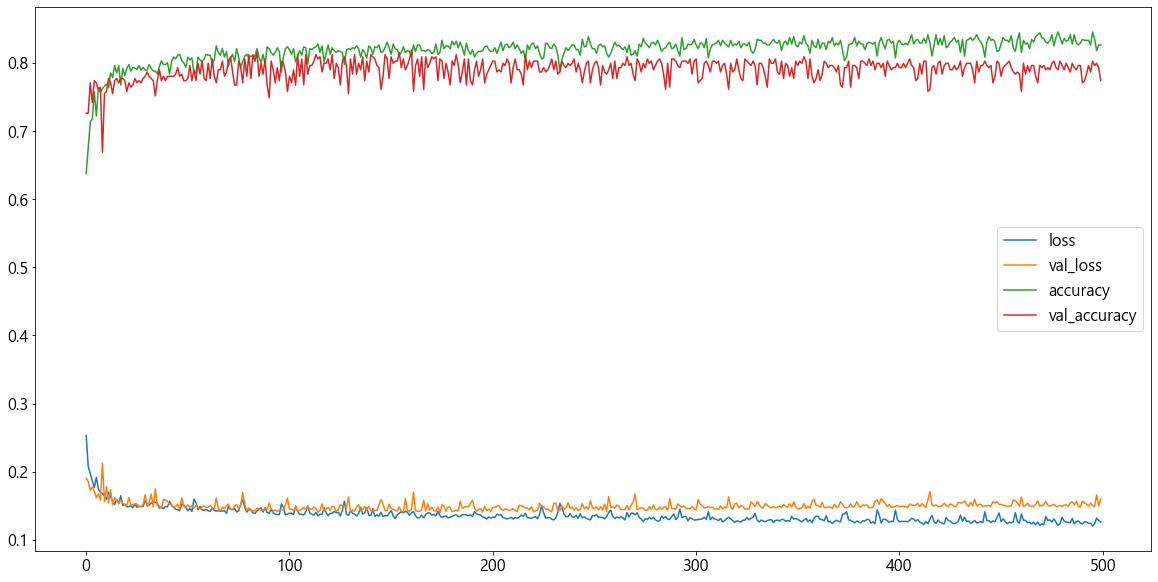

In [56]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (20, 10)

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

### 모델 평가하기

In [57]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.7739


[0.16004404425621033, 0.7738853693008423]

### 영화속 주인공의 생존률 확인 (1) --> 디카프리오
- pclass, sex, age, sibsp, parch, fare
- 객실등급, 성별, 나이, 형제 혹은 부부의 수, 부모 혹은 자녀의 수, 지불한 운임

In [58]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1, 6)
results = model.predict(dicaprio)
results

array([[0.2841123]], dtype=float32)

### 영화속 주인공의 생존률 확인 (2) --> 윈슬롯
- pclass, sex, age, sibsp, parch, fare
- 객실등급, 성별, 나이, 형제 혹은 부부의 수, 부모 혹은 자녀의 수, 지불한 운임

In [59]:
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)
results = model.predict(winslet)
results

array([[0.99986184]], dtype=float32)